# Longest segment through mean

This notebook shows a simple example on how to use the code contained in the `extractor_class.py` file.
This is used when we have a set of points that compose the border of a shape, and we want to extract the segments that start from the points on the border, pass through the mean point, and arrive on another point on the border.

## Importing libraries and data

In [6]:
from extractor_class import SegThroughMeanExt

import plotly.express as px
import plotly.graph_objects as go
import numpy as np

Data shape: (32, 2)


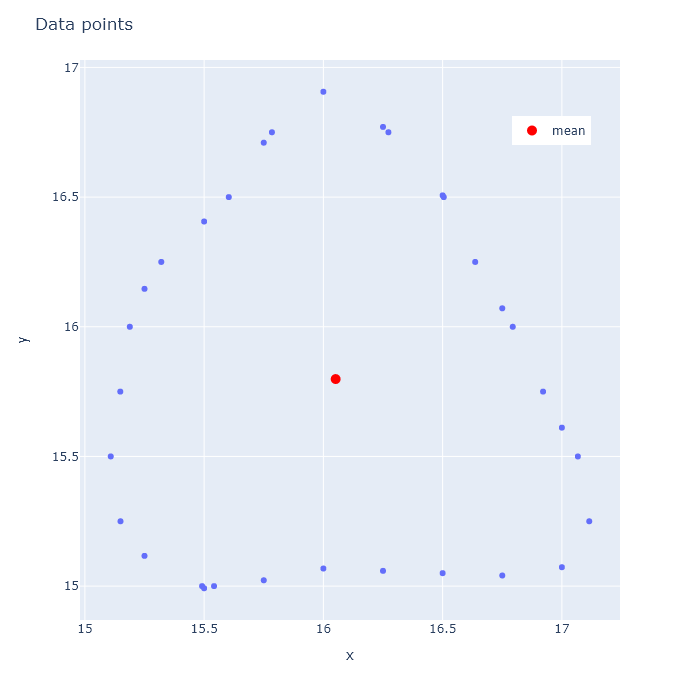

In [7]:
# Load the data and the mean point
data = np.load("points.npy")
mean_point = (np.mean(data[:, 0]), np.mean(data[:, 1]))

# Check the shape of the data
print(f"Data shape: {data.shape}")

# ----------------------------- plot -----------------------------
# for plotly
mean_marker = dict(color="red", size=10)
layout = {"width": 700, "height": 700, "legend": {"x": 0.8, "y": 0.9}}

fig = px.scatter(x=data[:, 0], y=data[:, 1])
fig.add_trace(
    go.Scatter(
        x=[mean_point[0]],
        y=[mean_point[1]],
        mode="markers",
        name="mean",
        marker=mean_marker,
    )
)
fig.update_layout(title="Data points", **layout)
fig.show("png")

## Finding the consecutive segments

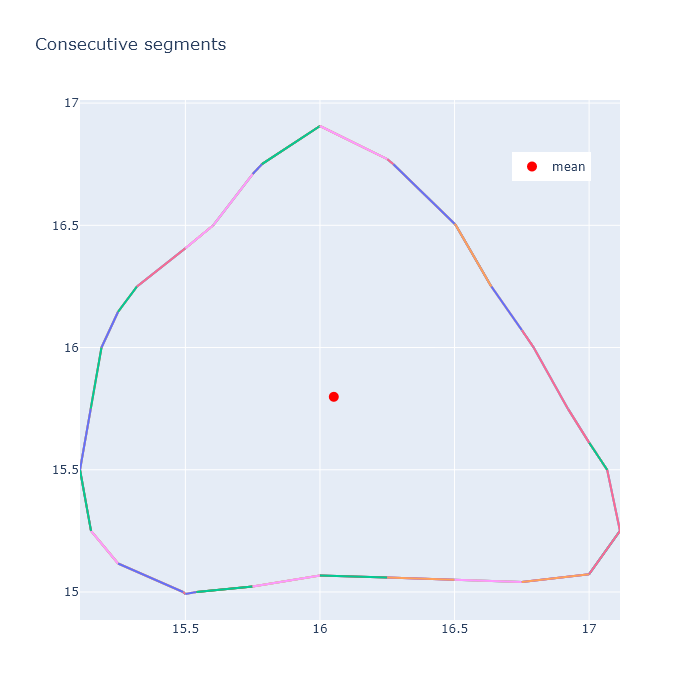

In [8]:
# first define the extractor
ext = SegThroughMeanExt(data=data)

# get the consecutive segments in the data
segments = ext.get_consecutive_segments()

# ----------------------------- plot -----------------------------
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=[mean_point[0]],
        y=[mean_point[1]],
        mode="markers",
        name="mean",
        marker=mean_marker,
    )
)
for segment in segments:
    fig.add_trace(
        go.Scatter(
            x=[segment[0][0], segment[1][0]],
            y=[segment[0][1], segment[1][1]],
            showlegend=False,
            mode="lines",
        )
    )
    fig.add_trace(
        go.Scatter(
            x=[segment[0][0], segment[1][0]],
            y=[segment[0][1], segment[1][1]],
            mode="lines",
            showlegend=False,
        )
    )

fig.update_layout(title="Consecutive segments", **layout)
fig.show("png")

### Get all the segments through the mean and extract the longest one

The length of the longest segment is 2.0611305236816406 mm


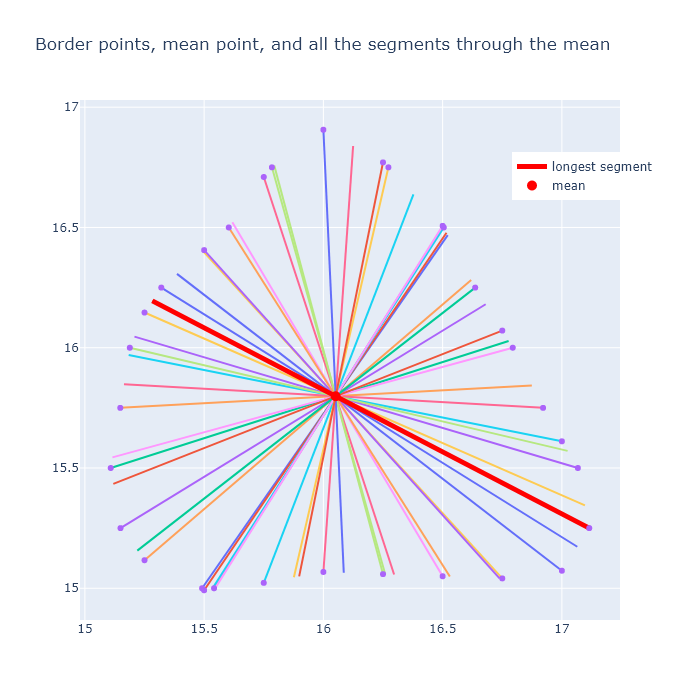

In [9]:
# get segments through mean
all_segments_through_mean1 = ext.get_all_segments_through_mean(optional_points=None)

# get the longest segment
max_segment1, max_length1 = ext.get_max_segment(all_segments_through_mean1)
print(f"The length of the longest segment is {max_length1} mm")

# ----------------------------- plot -----------------------------
fig = go.Figure()

for segment in all_segments_through_mean1:
    fig.add_trace(
        go.Scatter(
            x=[segment[0][0], segment[1][0]],
            y=[segment[0][1], segment[1][1]],
            showlegend=False,
            mode="lines",
        )
    )

fig.add_trace(
    go.Scatter(
        x=[max_segment1[0][0], max_segment1[1][0]],
        y=[max_segment1[0][1], max_segment1[1][1]],
        mode="lines",
        name="longest segment",
        line=dict(color="red", width=5),
    )
)

fig.add_trace(go.Scatter(x=data[:, 0], y=data[:, 1], mode="markers", showlegend=False))
fig.add_trace(
    go.Scatter(
        x=[mean_point[0]],
        y=[mean_point[1]],
        mode="markers",
        marker=mean_marker,
        name="mean",
    )
)

fig.update_layout(
    title="Border points, mean point, and all the segments through the mean", **layout
)
fig.show("png")

## Get more points on the border for a more precise measure

The length of the longest segment is 2.0611305236816406 mm


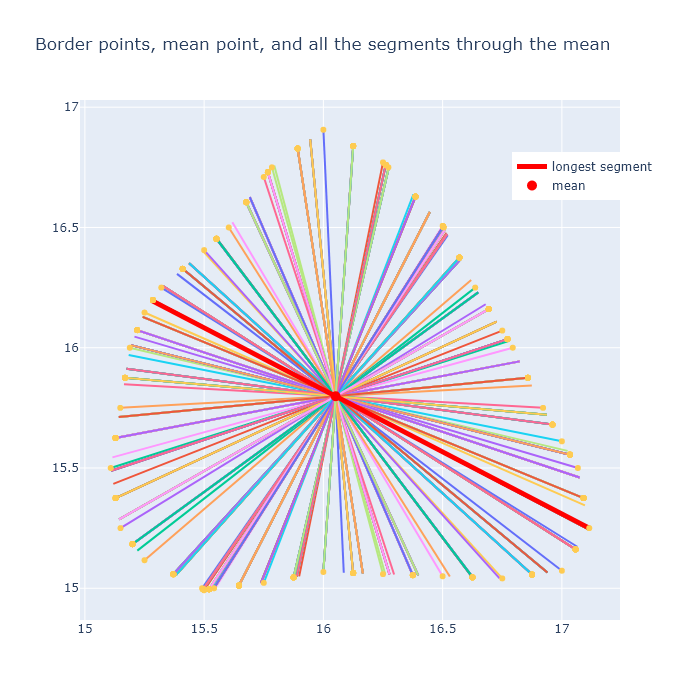

In [10]:
# get the same list of points, plus the points in the middle of each border segment
# (in alternative you can also provide an external list of points, else it uses the data points loaded before)
extra_points = ext.add_intermediate_points(times=4, optional_points=None)

# get segments through mean, using the extra points
all_segments_through_mean2 = ext.get_all_segments_through_mean(
    optional_points=extra_points
)

# get the longest segment
max_segment2, max_length2 = ext.get_max_segment(all_segments_through_mean2)
print(f"The length of the longest segment is {max_length2} mm")

# ----------------------------- plot -----------------------------
fig = go.Figure()

for segment in all_segments_through_mean2:
    fig.add_trace(
        go.Scatter(
            x=[segment[0][0], segment[1][0]],
            y=[segment[0][1], segment[1][1]],
            showlegend=False,
            mode="lines",
        )
    )

fig.add_trace(
    go.Scatter(
        x=[max_segment2[0][0], max_segment2[1][0]],
        y=[max_segment2[0][1], max_segment2[1][1]],
        mode="lines",
        name="longest segment",
        line=dict(color="red", width=5),
    )
)

fig.add_trace(
    go.Scatter(
        x=extra_points[:, 0], y=extra_points[:, 1], mode="markers", showlegend=False
    )
)
fig.add_trace(
    go.Scatter(
        x=[mean_point[0]],
        y=[mean_point[1]],
        mode="markers",
        marker=mean_marker,
        name="mean",
    )
)

fig.update_layout(
    title="Border points, mean point, and all the segments through the mean", **layout
)
fig.show("png")